In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()



In [41]:
 bank = pd.read_csv("bank-full (1).csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [42]:
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [43]:
Ncode = bank.select_dtypes(include=['object'])
Ncode.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [44]:
dummies = pd.get_dummies(Ncode,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
bank1 = pd.concat([bank,dummies],axis=1)
bank1.drop(columns=Ncode.columns,axis=1,inplace=True)

In [46]:
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
x = bank1.drop(['y'],1)
y = bank1['y']

C:\Users\Admin\AppData\Local\Temp/ipykernel_16524/3774532354.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = bank1.drop(['y'],1)


In [48]:
x.shape

(45211, 42)

In [49]:
y.shape

(45211,)

In [50]:
x_train,x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [51]:
x_test.shape

(9043, 42)

In [52]:
x_train.shape


(36168, 42)

In [53]:
y_train.shape

(36168,)

In [54]:
scaler = StandardScaler()
x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])
x_train


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,0.006515,0,-0.169381,1,0,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,...,0,0,0,1,0,0,0,0,0,1
17965,0.759937,0,0.017848,1,0,1.703422,0.047138,-0.245389,-0.411364,-0.244772,...,1,0,0,0,0,0,0,0,0,1
18299,0.100693,0,0.820681,0,0,1.823532,-0.493970,0.395606,-0.411364,-0.244772,...,1,0,0,0,0,0,0,0,0,1
10221,-0.370196,0,-0.489588,1,0,-0.578656,0.459781,2.639088,-0.411364,-0.244772,...,0,1,0,0,0,0,0,0,0,1
32192,1.419181,0,0.706889,0,0,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.289048,0,-0.099915,0,0,0.262110,7.147714,-0.565886,-0.411364,-0.244772,...,0,1,0,0,0,0,0,0,0,1
44732,-1.688684,0,-0.282181,0,0,-0.938984,-0.182541,-0.565886,0.517649,0.177056,...,0,0,0,0,0,0,1,0,0,0
38158,-0.652729,0,-0.014570,1,0,-0.098218,-0.069648,-0.565886,-0.411364,-0.244772,...,0,0,0,1,0,0,0,0,0,1
860,-0.746907,0,-0.395643,0,0,-1.059093,-0.567934,-0.565886,-0.411364,-0.244772,...,0,0,0,1,0,0,0,0,0,1


In [55]:
import statsmodels.api as sm
logm = sm.GLM(y_train,(sm.add_constant(x_train.values)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36125
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8588.9
Date:                Mon, 16 Jan 2023   Deviance:                       17178.
Time:                        17:13:22   Pearson chi2:                 1.52e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4741      0.153     -9.659      0.000      -1.773      -1.175
x1             0.0190      0.026      0.723      0.470      -0.032       0.070
x2            -0.0681      0.182     -0.374      0.708      -0.425       0.289
x3             0.0278      0.018      1.568      0.117      -0.007       0.063
x4            -0.6822      0.049    -13.848      0.000      -0.779      -0.586
x5            -0.4057      0.067     -6.093      0.000      -0.536      -0.275
x6             0.0844      0.023      3.613      0.000       0.039       0.130
x7             1.0825      0.019     57.826      0.000       1.046       1.119
x8            -0.2746      0.035     -7.763      0.000      -0.344      -0.205
x9            -0.0129      0.034     -0.380      0.704      -0.080       0.054
x10            0.0179      0.015      1.191      0.234      -0.012       0.047
x11           -0.3124      0.081     -3.841      0.000      -0.472      -0.153
x12           -0.3257      0.140     -2.319      0.020      -0.601      -0.050
x13           -0.4654      0.151     -3.085      0.002      -0.761      -0.170
x14           -0.1654      0.083     -2.003      0.045      -0.327      -0.004
x15            0.1790      0.109      1.639      0.101      -0.035       0.393
x16           -0.2321      0.123     -1.880      0.060      -0.474       0.010
x17           -0.1948      0.093     -2.089      0.037      -0.378      -0.012
x18            0.3333      0.123      2.710      0.007       0.092       0.574
x19           -0.2053      0.077     -2.656      0.008      -0.357      -0.054
x20           -0.1538      0.125     -1.228      0.219      -0.399       0.092
x21           -0.3937      0.262     -1.506      0.132      -0.906       0.119
x22           -0.1806      0.066     -2.739      0.006      -0.310      -0.051
x23            0.1009      0.075      1.339      0.181      -0.047       0.249
x24            0.2072      0.073      2.851      0.004       0.065       0.350
x25            0.3718      0.085      4.395      0.000       0.206       0.538
x26            0.1893      0.118      1.601      0.109      -0.042       0.421
x27           -0.1176      0.084     -1.407      0.159      -0.281       0.046
x28           -1.6559      0.083    -19.913      0.000      -1.819      -1.493
x29           -0.6827      0.087     -7.802      0.000      -0.854      -0.511
x30            0.6223      0.192      3.250      0.001       0.247       0.998
x31           -0.2399      0.101     -2.376      0.018      -0.438      -0.042
x32           -1.2890      0.136     -9.470      0.000      -1.556      -1.022
x33           -0.8535      0.086     -9.914      0.000      -1.022      -0.685
x34            0.4276      0.105      4.069      0.000       0.222       0.634
x35            1.5467      0.135     11.472      0.000       1.282       1.811
x3

In [56]:
from sklearn.feature_selection import RFE

In [57]:
logreg = LogisticRegression()
# Running RFE with 13 variables as output
logreg.fit(x_train,y_train)

LogisticRegression()

In [58]:
logreg.score(x_train,y_train)

0.902621101526211

In [59]:
logreg = LogisticRegression()
# Running RFE with 13 variables as output
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7952
           1       0.12      1.00      0.22      1091

    accuracy                           0.12      9043
   macro avg       0.56      0.50      0.11      9043
weighted avg       0.89      0.12      0.03      9043



In [61]:
logreg = LogisticRegression()
# Running RFE with 13 variables as output
rfe = RFE(logreg,)
rfe = rfe.fit(x_train,y_train)

In [62]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 20),
 ('default', False, 17),
 ('balance', False, 19),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 18),
 ('duration', True, 1),
 ('campaign', False, 2),
 ('pdays', False, 22),
 ('previous', False, 21),
 ('job_blue-collar', False, 8),
 ('job_entrepreneur', False, 7),
 ('job_housemaid', True, 1),
 ('job_management', False, 12),
 ('job_retired', True, 1),
 ('job_self-employed', False, 9),
 ('job_services', False, 10),
 ('job_student', True, 1),
 ('job_technician', False, 11),
 ('job_unemployed', False, 13),
 ('job_unknown', False, 6),
 ('marital_married', True, 1),
 ('marital_single', False, 16),
 ('education_secondary', False, 4),
 ('education_tertiary', False, 3),
 ('education_unknown', False, 5),
 ('contact_telephone', False, 15),
 ('contact_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1

In [63]:
col1 = x_train.columns[rfe.support_]

In [64]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train)
res = logm1.fit()
res.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36126
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                        0.072512
Method:                          IRLS   Log-Likelihood:                -3846.7
Date:                Mon, 16 Jan 2023   Deviance:                       2619.6
Time:                        17:13:43   Pearson chi2:                 2.62e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0065      0.002      3.499      0.000       0.003       0.010
default                -0.0039      0.011     -0.372      0.710      -0.025       0.017
balance                 0.0027      0.001      1.829      0.067      -0.000       0.006
housing                -0.0365      0.003    -10.880      0.000      -0.043      -0.030
loan                   -0.0191      0.004     -4.813      0.000      -0.027      -0.011
day                     0.0091      0.002      5.503      0.000       0.006       0.012
duration                0.1206      0.001     84.391      0.000       0.118       0.123
campaign               -0.0060      0.001     -4.008      0.000      -0.009      -0.003
pdays                   0.0217      0.003      8.368      0.000       0.017       0.027
previous                0.0059      0.002      3.558      0.000       0.003       0.009
job_blue-collar         0.0140      0.005      2.729      0.006       0.004       0.024
job_entrepreneur        0.0048      0.009      0.535      0.593      -0.013       0.022
job_housemaid           0.0100      0.010      1.048      0.294      -0.009       0.029
job_management          0.0155      0.006      2.625      0.009       0.004       0.027
job_retired             0.0573      0.008      6.946      0.000       0.041       0.073
job_self-employed       0.0096      0.009      1.107      0.268      -0.007       0.027
job_services            0.0132      0.006      2.166      0.030       0.001       0.025
job_student             0.0964      0.011      8.733      0.000       0.075       0.118
job_technician          0.0126      0.005      2.357      0.018       0.002       0.023
job_unemployed          0.0245      0.009      2.610      0.009       0.006       0.043
job_unknown            -0.0014      0.018     -0.075      0.940      -0.037       0.035
marital_married         0.0157      0.004      3.598      0.000       0.007       0.024
marital_single          0.0387      0.005      7.604      0.000       0.029       0.049
education_secondary     0.0373      0.004      8.762      0.000       0.029       0.046
education_tertiary      0.0520      0.005      9.463      0.000       0.041       0.063
education_unknown       0.0322      0.008      4.018      0.000       0.016       0.048
contact_telephone      -0.0058      0.006     -0.955      0.340      -0.018       0.006
contact_unknown        -0.0904      0.005    -18.501      0.000      -0.100      -0.081
month_aug              -0.0262      0.007     -3.895      0.000      -0.039      -0.013
month_dec               0.1769      0.021      8.569      0.000       0.136       0.217
month_feb               0.0253      0.008      3.184      0.001       0.010       0.041
month_jan              -0.0645      0.010     -6.725      0.000      -0.083      -0.046
mon

In [65]:
y_pred1 = res.predict(x_test)

In [66]:
y_pred1

3776     25.101481
9928     20.188660
33409    29.236854
31885    49.964086
15738    15.802471
           ...    
13353    24.923384
38732    84.487503
5654     25.386925
3779     23.053285
11677    26.517794
Length: 9043, dtype: float64

In [67]:
y_pred2 = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_pred1})
y_pred2['Cust_id'] = y_test.index

In [68]:
y_pred2

,Sub,Sub_prob,Cust_id
3776,0,25.101481,3776
9928,0,20.188660,9928
33409,0,29.236854,33409
31885,0,49.964086,31885
15738,0,15.802471,15738
...,...,...,...
13353,0,24.923384,13353
38732,1,84.487503,38732
5654,0,25.386925,5654
3779,0,23.053285,3779


In [69]:
y_pred2['predict'] = y_pred2['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)


In [70]:
y_pred2

,Sub,Sub_prob,Cust_id,predict
3776,0,25.101481,3776,1
9928,0,20.188660,9928,1
33409,0,29.236854,33409,1
31885,0,49.964086,31885,1
15738,0,15.802471,15738,1
...,...,...,...,...
13353,0,24.923384,13353,1
38732,1,84.487503,38732,1
5654,0,25.386925,5654,1
3779,0,23.053285,3779,1


In [71]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_pred2.Sub, y_pred2.predict)
confusion

array([[   2, 7950],
       [   0, 1091]], dtype=int64)

In [72]:
print(metrics.accuracy_score(y_pred2.Sub, y_pred2.predict))

0.1208669689262413


In [73]:
y_pred1.shape

(9043,)

In [74]:
((39149 + 1142))/((4147+773+1142+39149))*100

89.11769259693438

In [75]:
bank.shape

(45211, 17)

In [76]:
y_pred1.shape

(9043,)

In [77]:
y_pred=res.predict(x_test)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
# Running RFE with 13 variables as output
logreg.fit(x_train,y_train)
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred1)



In [108]:
auc

0.8173598188581536

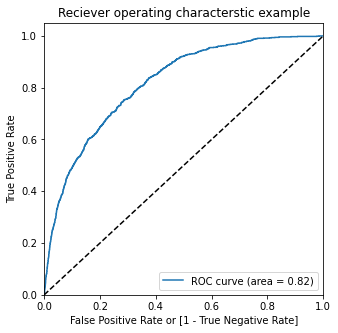

In [109]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None
draw_roc(y_pred2.Sub, y_pred2.Sub_prob)


In [110]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred[i] = y_pred2.Sub_prob.map(lambda x: 1 if x>i else 0)
y_pred2.head()

,Sub,Sub_prob,Cust_id,predict,final_predicted
3776,0,25.101481,3776,1,1
9928,0,20.188660,9928,1,1
33409,0,29.236854,33409,1,1
31885,0,49.964086,31885,1,1
15738,0,15.802471,15738,1,1


In [123]:
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred2.Sub, y_pred[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy  sensi     speci
0.0   0.0  0.120756    1.0  0.000126
0.1   0.1  0.120756    1.0  0.000126
0.2   0.2  0.120756    1.0  0.000126
0.3   0.3  0.120756    1.0  0.000126
0.4   0.4  0.120756    1.0  0.000126
0.5   0.5  0.120867    1.0  0.000252
0.6   0.6  0.120978    1.0  0.000377
0.7   0.7  0.120978    1.0  0.000377
0.8   0.8  0.120978    1.0  0.000377
0.9   0.9  0.121199    1.0  0.000629


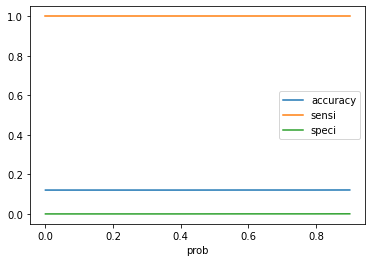

In [124]:
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [113]:
#the line doesnt intersect so i'll be taking 0.5 as the best cutoff

In [114]:
confusion2 = metrics.confusion_matrix(y_pred2.Sub, y_pred2.predict)
confusion2

array([[   2, 7950],
       [   0, 1091]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
TP/float(TP+FN)

1.0

In [117]:
TN/float(TN+FP)


0.00025150905432595576

In [118]:
FP/float(TN+FP)


0.9997484909456741

In [119]:
TP/float(TP+FP)


0.12067249198097556

In [120]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.12067249198097556

In [121]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])


1.0

In [130]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

precision_score(y_pred2.Sub, y_pred2.predict)


0.12067249198097556

In [129]:
recall_score(y_pred2.Sub, y_pred2.predict)

1.0

In [131]:
p, r, thresholds = precision_recall_curve(y_pred2.Sub, y_pred2.Sub_prob)


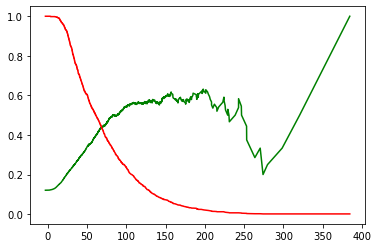

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [134]:
metrics.accuracy_score(y_pred2.Sub, y_pred2.predict)


0.1208669689262413